In [307]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

seed = 100
rng = default_rng(seed)
data_folder = "../data/"

In [308]:
# 1D assignment

def plot_clusters(title, data, clusters):
    for cluster in clusters:
        members = data.loc[data["ideal cluster"] == cluster]
        points = members["point"].values
        plt.scatter(points, np.zeros_like(points))
    plt.title(title)

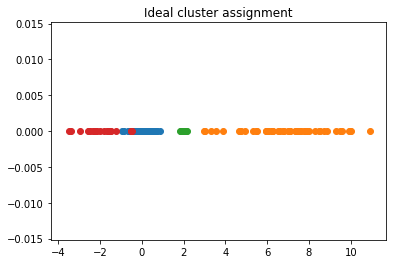

In [309]:
df = pd.read_csv(data_folder + "1d.txt", names=["point", "ideal cluster"])
ideal_clusters = df["ideal cluster"].unique()
plot_clusters("Ideal cluster assignment", df, ideal_clusters)

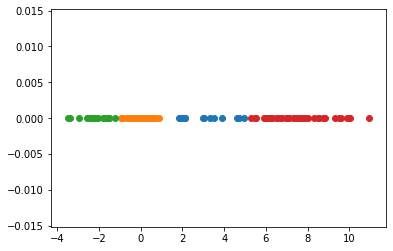

In [310]:
def pick_initial_centroids(k: int, points: np.ndarray) -> np.ndarray:
    return rng.choice(points, size=k)

def compute_distances(points: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    return np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))

def get_closest_centroids(points: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    distances = compute_distances(points, centroids)
    return np.argmin(distances, axis=0)

def cluster_points(points: np.ndarray, centroids: np.ndarray, closest: np.ndarray) -> np.ndarray:
    return np.array([points[closest==i] for i in range(len(centroids))])

def update_centroids(clusters: np.ndarray) -> np.ndarray:
    return np.array([cluster.mean(axis=0) for cluster in clusters])

def k_means_cluster_step(points: np.ndarray, centroids: np.ndarray) -> (np.ndarray, np.ndarray):
    closest = get_closest_centroids(points, centroids)
    clusters = cluster_points(points, centroids, closest)
    centroids = update_centroids(clusters)
    return clusters, centroids

def k_means_clustering(points: np.ndarray, k: int, iterations: int) -> np.ndarray:
    centroids = get_initial_centroids(k, points)
    for i in range(iterations):
        clusters, centroids = k_means_cluster_step(points, centroids)
    return clusters

k = 4
iterations = 1000
points = df["point"].values[:, np.newaxis]

clusters = k_means_clustering(points, k, iterations)
for cluster in clusters:
    plt.scatter(cluster, np.zeros_like(cluster))

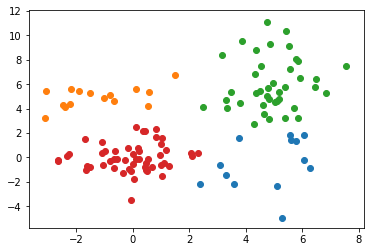

In [311]:
# 2D assignment

# df_b_points = df_b_raw[0].str[1:-1].str.split(expand=True)
# df_b_results = df_b_raw[1]
# df_b = pd.concat([df_b_points, df_b_results], axis=1)
# df_b

df = pd.read_csv(data_folder + "2d.txt", names=["points", "ideal cluster"])
parsed_points = df["points"].str[1:-1].str.split(expand=True).astype(float)
points = parsed_points.values

clusters = k_means_clustering(points, k, iterations)
for cluster in clusters:
    plt.scatter(cluster[:,0], cluster[:,1])